In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [128]:
sales = pd.read_csv("./lab3/data/sales_data_sample.csv", encoding='ISO-8859-1')
sales.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [129]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [130]:
sales.shape

(2823, 25)

In [131]:
sales.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [133]:
total_null = sales.isnull().sum().sort_values(ascending = False) # Total de nulos
percent_null = (sales.isnull().sum()/sales.isnull().count()).sort_values(ascending = False) #porcentaje de nulos
missing_data = pd.concat([total_null,percent_null],axis = 1,keys=['total_null','percent_null'])
missing_data

,total_null,percent_null
ADDRESSLINE2,2521,0.893022
STATE,1486,0.526390
TERRITORY,1074,0.380446
POSTALCODE,76,0.026922
ORDERNUMBER,0,0.000000
CUSTOMERNAME,0,0.000000
CONTACTFIRSTNAME,0,0.000000
CONTACTLASTNAME,0,0.000000
COUNTRY,0,0.000000
CITY,0,0.000000


In [134]:
sales.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [136]:
# Seleccion de columnas 
sales[["CUSTOMERNAME","CONTACTFIRSTNAME"]]

,CUSTOMERNAME,CONTACTFIRSTNAME
0,Land of Toys Inc.,Kwai
1,Reims Collectables,Paul
2,Lyon Souveniers,Daniel
3,Toys4GrownUps.com,Julie
4,Corporate Gift Ideas Co.,Julie
...,...,...
2818,Euro Shopping Channel,Diego
2819,"Oulu Toy Supplies, Inc.",Pirkko
2820,Euro Shopping Channel,Diego
2821,Alpha Cognac,Annette


In [137]:
# Seleccion de columnas mediante una lista
sales[sales.columns[-2:]]


,CONTACTFIRSTNAME,DEALSIZE
0,Kwai,Small
1,Paul,Small
2,Daniel,Medium
3,Julie,Medium
4,Julie,Medium
...,...,...
2818,Diego,Small
2819,Pirkko,Medium
2820,Diego,Medium
2821,Annette,Small


In [139]:
# Creamos una mascara boolean
booleanMask = sales.columns.isin(["CUSTOMERNAME","CONTACTFIRSTNAME1"])
 
# guardamos las columnas que vamos a seleccionar 
selectedCols = sales.columns[booleanMask]
 
# Seleccionamos las columnas deseadas
sales[selectedCols]

,CUSTOMERNAME
0,Land of Toys Inc.
1,Reims Collectables
2,Lyon Souveniers
3,Toys4GrownUps.com
4,Corporate Gift Ideas Co.
...,...
2818,Euro Shopping Channel
2819,"Oulu Toy Supplies, Inc."
2820,Euro Shopping Channel
2821,Alpha Cognac


In [145]:
# Usar .loc y .iloc para seleccionar columnas por nombre o posición
# .loc seleccion de una columna simple
sales.loc[:, 'CUSTOMERNAME' ]

0              Land of Toys Inc.
1             Reims Collectables
2                Lyon Souveniers
3              Toys4GrownUps.com
4       Corporate Gift Ideas Co.
                  ...           
2818       Euro Shopping Channel
2819     Oulu Toy Supplies, Inc.
2820       Euro Shopping Channel
2821                Alpha Cognac
2822           Gifts4AllAges.com
Name: CUSTOMERNAME, Length: 2823, dtype: object

In [155]:
# Selección de columnas multiples
df.loc[:, ["CUSTOMERNAME","CONTACTFIRSTNAME"] ]

,CUSTOMERNAME,CONTACTFIRSTNAME
0,Land of Toys Inc.,Kwai
1,Reims Collectables,Paul
2,Lyon Souveniers,Daniel
3,Toys4GrownUps.com,Julie
4,Corporate Gift Ideas Co.,Julie
...,...,...
2818,Euro Shopping Channel,Diego
2819,"Oulu Toy Supplies, Inc.",Pirkko
2820,Euro Shopping Channel,Diego
2821,Alpha Cognac,Annette


In [157]:
# uso de iloc
sales.iloc[:, [0, 2, 3] ]

,ORDERNUMBER,PRICEEACH,ORDERLINENUMBER
0,10107,95.70,2
1,10121,81.35,5
2,10134,94.74,2
3,10145,83.26,6
4,10159,100.00,14
...,...,...,...
2818,10350,100.00,15
2819,10373,100.00,1
2820,10386,100.00,4
2821,10397,62.24,1


In [159]:
# seleccionamos las columnas que contengas NUMBER
sales.filter(like='NUMBER')

,ORDERNUMBER,ORDERLINENUMBER
0,10107,2
1,10121,5
2,10134,2
3,10145,6
4,10159,14
...,...,...
2818,10350,15
2819,10373,1
2820,10386,4
2821,10397,1


In [160]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [163]:
# Seleccionamos columnas de tipo entero
sales.select_dtypes(include=['int64'])

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,QTR_ID,MONTH_ID,YEAR_ID,MSRP
0,10107,30,2,1,2,2003,95
1,10121,34,5,2,5,2003,95
2,10134,41,2,3,7,2003,95
3,10145,45,6,3,8,2003,95
4,10159,49,14,4,10,2003,95
...,...,...,...,...,...,...,...
2818,10350,20,15,4,12,2004,54
2819,10373,29,1,1,1,2005,54
2820,10386,43,4,1,3,2005,54
2821,10397,34,1,1,3,2005,54


In [166]:
# Concat & Append
fruta = { 'orange' : [3,2,0,1], 'apple' : [0,3,7,2], 'grapes' : [7,14,6,15] } 
df1 = pd.DataFrame(fruta) 
df1

,orange,apple,grapes
0,3,0,7
1,2,3,14
2,0,7,6
3,1,2,15


In [167]:
fruta = { 'grapes' : [13,12,10,2,55,98], 'mango' : [10,13,17,2,9,76], 'banana' : [20,23,27,4,0,9], 'pear' : [21,24,28,51,22,25], 'pineapple' : [30,33,38,30,36,31] } 
df2 = pd.DataFrame(fruta) 
df2

,grapes,mango,banana,pear,pineapple
0,13,10,20,21,30
1,12,13,23,24,33
2,10,17,27,28,38
3,2,2,4,51,30
4,55,9,0,22,36
5,98,76,9,25,31


In [169]:
# axis=0 se concatena de forma horizontal
pd.concat((df1, df2), axis = 0)

,orange,apple,grapes,mango,banana,pear,pineapple
0,3.0,0.0,7,NaN,NaN,NaN,NaN
1,2.0,3.0,14,NaN,NaN,NaN,NaN
2,0.0,7.0,6,NaN,NaN,NaN,NaN
3,1.0,2.0,15,NaN,NaN,NaN,NaN
0,NaN,NaN,13,10.0,20.0,21.0,30.0
1,NaN,NaN,12,13.0,23.0,24.0,33.0
2,NaN,NaN,10,17.0,27.0,28.0,38.0
3,NaN,NaN,2,2.0,4.0,51.0,30.0
4,NaN,NaN,55,9.0,0.0,22.0,36.0
5,NaN,NaN,98,76.0,9.0,25.0,31.0


In [170]:
# axis=1 se concatena en forma vertical
pd.concat((df1, df2), axis = 1)

,orange,apple,grapes,grapes,mango,banana,pear,pineapple
0,3.0,0.0,7.0,13,10,20,21,30
1,2.0,3.0,14.0,12,13,23,24,33
2,0.0,7.0,6.0,10,17,27,28,38
3,1.0,2.0,15.0,2,2,4,51,30
4,NaN,NaN,NaN,55,9,0,22,36
5,NaN,NaN,NaN,98,76,9,25,31


In [171]:
df1.append(df2)

C:\Users\Kremlin\AppData\Local\Temp\ipykernel_47668\3062608662.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2)


,orange,apple,grapes,mango,banana,pear,pineapple
0,3.0,0.0,7,NaN,NaN,NaN,NaN
1,2.0,3.0,14,NaN,NaN,NaN,NaN
2,0.0,7.0,6,NaN,NaN,NaN,NaN
3,1.0,2.0,15,NaN,NaN,NaN,NaN
0,NaN,NaN,13,10.0,20.0,21.0,30.0
1,NaN,NaN,12,13.0,23.0,24.0,33.0
2,NaN,NaN,10,17.0,27.0,28.0,38.0
3,NaN,NaN,2,2.0,4.0,51.0,30.0
4,NaN,NaN,55,9.0,0.0,22.0,36.0
5,NaN,NaN,98,76.0,9.0,25.0,31.0


In [172]:
df1

,orange,apple,grapes
0,3,0,7
1,2,3,14
2,0,7,6
3,1,2,15


In [173]:
 df2

,grapes,mango,banana,pear,pineapple
0,13,10,20,21,30
1,12,13,23,24,33
2,10,17,27,28,38
3,2,2,4,51,30
4,55,9,0,22,36
5,98,76,9,25,31


In [174]:
df3 = df1

In [175]:
df3["mango"]=0

In [178]:
df3

,orange,apple,grapes,mango
0,3,0,7,0
1,2,3,14,0
2,0,7,6,0
3,1,2,15,0


In [180]:
df1

,orange,apple,grapes,mango
0,3,0,7,0
1,2,3,14,0
2,0,7,6,0
3,1,2,15,0


In [181]:
df4 = df2.copy()

In [182]:
df4["mango"]=0

In [184]:
df4

,grapes,mango,banana,pear,pineapple
0,13,0,20,21,30
1,12,0,23,24,33
2,10,0,27,28,38
3,2,0,4,51,30
4,55,0,0,22,36
5,98,0,9,25,31


In [185]:
df2

,grapes,mango,banana,pear,pineapple
0,13,10,20,21,30
1,12,13,23,24,33
2,10,17,27,28,38
3,2,2,4,51,30
4,55,9,0,22,36
5,98,76,9,25,31


In [186]:
import pandas as pd
df1 = pd.DataFrame(
    [
       (1, 345, 'B', True),
       (2, 100, 'C', False),
       (3, 300, 'B', False),
       (4, 151, 'A', False),
       (5, 212, 'A', True),
       (6, 121, 'C', False),
       (7, 333, 'B', True),
       (8, 456, 'C', True),
    ],
    columns=['id', 'value', 'colC', 'colD'])
df2 = pd.DataFrame(
    [
       (1, 111, 10.1, 3),
       (9, 56, 3.33, 10),
       (10, 17, 18.0, 8),
       (3, 567, 19.1, 4),
       (11, 98, 2.1, 1),
       (6, 31, 3.14, 12),
    ],
    columns=['id', 'value', 'colE', 'colF'])

In [187]:
# Inner join
df1.merge(df2, on='id')

,id,value_x,colC,colD,value_y,colE,colF
0,1,345,B,True,111,10.10,3
1,3,300,B,False,567,19.10,4
2,6,121,C,False,31,3.14,12


In [188]:
# left join
df1.merge(df2, on='id', how='left')

,id,value_x,colC,colD,value_y,colE,colF
0,1,345,B,True,111.0,10.10,3.0
1,2,100,C,False,NaN,NaN,NaN
2,3,300,B,False,567.0,19.10,4.0
3,4,151,A,False,NaN,NaN,NaN
4,5,212,A,True,NaN,NaN,NaN
5,6,121,C,False,31.0,3.14,12.0
6,7,333,B,True,NaN,NaN,NaN
7,8,456,C,True,NaN,NaN,NaN


In [189]:
# right join
df1.merge(df2, on='id', how='right')

,id,value_x,colC,colD,value_y,colE,colF
0,1,345.0,B,True,111,10.10,3
1,9,NaN,NaN,NaN,56,3.33,10
2,10,NaN,NaN,NaN,17,18.00,8
3,3,300.0,B,False,567,19.10,4
4,11,NaN,NaN,NaN,98,2.10,1
5,6,121.0,C,False,31,3.14,12


In [190]:
# full outer join
df1.merge(df2, on='id', how='outer')

,id,value_x,colC,colD,value_y,colE,colF
0,1,345.0,B,True,111.0,10.10,3.0
1,2,100.0,C,False,NaN,NaN,NaN
2,3,300.0,B,False,567.0,19.10,4.0
3,4,151.0,A,False,NaN,NaN,NaN
4,5,212.0,A,True,NaN,NaN,NaN
5,6,121.0,C,False,31.0,3.14,12.0
6,7,333.0,B,True,NaN,NaN,NaN
7,8,456.0,C,True,NaN,NaN,NaN
8,9,NaN,NaN,NaN,56.0,3.33,10.0
9,10,NaN,NaN,NaN,17.0,18.00,8.0


In [193]:
# left anti join
df1.merge(df2, on='id', how='left', indicator=True)
df1.merge(df2, on='id', how='left', indicator=True) \
    .query('_merge == "left_only"') \
    .drop('_merge', 1)

C:\Users\Kremlin\AppData\Local\Temp\ipykernel_47668\4252564163.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1.merge(df2, on='id', how='left', indicator=True) \


,id,value_x,colC,colD,value_y,colE,colF
1,2,100,C,False,NaN,NaN,NaN
3,4,151,A,False,NaN,NaN,NaN
4,5,212,A,True,NaN,NaN,NaN
6,7,333,B,True,NaN,NaN,NaN
7,8,456,C,True,NaN,NaN,NaN


In [196]:
# right anti join
df1.merge(df2, on='id', how='right', indicator=True)
df1.merge(df2, on='id', how='right', indicator=True) \
  .query('_merge == "right_only"') \
  .drop('_merge', 1)

C:\Users\Kremlin\AppData\Local\Temp\ipykernel_47668\2890148728.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1.merge(df2, on='id', how='right', indicator=True) \


,id,value_x,colC,colD,value_y,colE,colF
1,9,NaN,NaN,NaN,56,3.33,10
2,10,NaN,NaN,NaN,17,18.00,8
4,11,NaN,NaN,NaN,98,2.10,1


In [ ]:
# Joins con multiples columnas
df1.merge(df2, left_on=['colA', 'colB'], right_on=['colC', 'colD])

In [197]:
sales = pd.read_csv("./lab3/data/sales_data_sample.csv", encoding='ISO-8859-1')
sales.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [198]:
sales.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [199]:
sales['STATE'].fillna(value='NY', inplace=True)


In [200]:
sales["STATE"].isna().sum()

0

In [207]:
df = sales[['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME']]
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc."
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac


In [ ]:
# seleccionamos filas en base a condiciones
df2 = sales[(sales.STATE == 'NY') & (sales.QTR_ID == 1)]

In [ ]:
df3 = df2.query('STATE == "NY"')

In [201]:
import pandas as pd
data = {'id': [1, 2, 3, 4, 5, 6, 7, 7],
        'first_name': ['Sigrid', 'Kennedy', 'Theodoric', 'Sigrid', 'Kennedy', 'Beatrix', 'Olimpia', 'Olimpia'],
        'last_name': ['Mannock', 'Donnell', 'Rivers', 'Mannock', 'Donnell', 'Parlett', 'Guenther', 'Guenther'],
        'age': [27, 31, 36, 27, 53, 48, 36, 36],
        'amount': [7.17, 1.90, 1.11, 7.17, 1.41, 6.69, 4.62, 4.62]}
df = pd.DataFrame(data, columns = ['id', 'first_name', 'last_name', 'age', 'amount'])
df

,id,first_name,last_name,age,amount
0,1,Sigrid,Mannock,27,7.17
1,2,Kennedy,Donnell,31,1.90
2,3,Theodoric,Rivers,36,1.11
3,4,Sigrid,Mannock,27,7.17
4,5,Kennedy,Donnell,53,1.41
5,6,Beatrix,Parlett,48,6.69
6,7,Olimpia,Guenther,36,4.62
7,7,Olimpia,Guenther,36,4.62


In [202]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
dtype: bool

In [203]:
df = df.drop_duplicates()
df

,id,first_name,last_name,age,amount
0,1,Sigrid,Mannock,27,7.17
1,2,Kennedy,Donnell,31,1.90
2,3,Theodoric,Rivers,36,1.11
3,4,Sigrid,Mannock,27,7.17
4,5,Kennedy,Donnell,53,1.41
5,6,Beatrix,Parlett,48,6.69
6,7,Olimpia,Guenther,36,4.62


In [205]:
# Busca duplicados en una sola columa
df.duplicated(df.columns[~df.columns.isin(['id'])])

0    False
1    False
2    False
4    False
5    False
6    False
dtype: bool

In [206]:
df = df.drop_duplicates(df.columns[~df.columns.isin(['id'])],
                        keep='first')
df

,id,first_name,last_name,age,amount
0,1,Sigrid,Mannock,27,7.17
1,2,Kennedy,Donnell,31,1.90
2,3,Theodoric,Rivers,36,1.11
4,5,Kennedy,Donnell,53,1.41
5,6,Beatrix,Parlett,48,6.69
6,7,Olimpia,Guenther,36,4.62


In [208]:
sales.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [210]:
sales.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE                  0
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [213]:
# group by
sales[["COUNTRY","PRICEEACH"]].groupby("COUNTRY").count()

,PRICEEACH
COUNTRY,
Australia,185
Austria,55
Belgium,33
Canada,70
Denmark,63
Finland,92
France,314
Germany,62
Ireland,16


In [214]:
sales[["COUNTRY","PRICEEACH"]].groupby("COUNTRY").mean()

,PRICEEACH
COUNTRY,
Australia,83.508865
Austria,86.530182
Belgium,87.494242
Canada,85.100714
Denmark,87.363333
Finland,83.936413
France,82.550541
Germany,83.617742
Ireland,86.123750


In [215]:
sales[["COUNTRY","PRICEEACH"]].groupby("COUNTRY").min()

,PRICEEACH
COUNTRY,
Australia,26.88
Austria,42.67
Belgium,45.86
Canada,35.35
Denmark,37.13
Finland,40.31
France,29.21
Germany,31.20
Ireland,52.82


In [222]:
sales.sort_values(by=["PRICEEACH"]) 

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
1563,10420,45,26.88,1,1209.60,5/29/2005 0:00,In Process,2,5,2005,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small
1543,10162,37,27.22,5,1007.14,10/18/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Small
1724,10195,32,28.29,7,905.28,11/25/2003 0:00,Shipped,4,11,2003,...,3758 North Pendale Street,NaN,White Plains,NY,24067,USA,NaN,Frick,Steve,Small
1551,10280,20,28.88,12,577.60,8/17/2004 0:00,Shipped,3,8,2004,...,Via Monte Bianco 34,NaN,Torino,NY,10100,Italy,EMEA,Accorti,Paolo,Small
1549,10227,42,29.21,6,1226.82,3/2/2004 0:00,Shipped,1,3,2004,...,"2, rue du Commerce",NaN,Lyon,NY,69004,France,EMEA,Saveley,Mary,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,10104,29,100.00,12,3772.61,1/31/2003 0:00,Shipped,1,1,2003,...,"C/ Moralzarzal, 86",NaN,Madrid,NY,28034,Spain,EMEA,Freyre,Diego,Medium
703,10114,39,100.00,3,4164.42,4/1/2003 0:00,Shipped,2,4,2003,...,"265, boulevard Charonne",NaN,Paris,NY,75012,France,EMEA,Bertrand,Marie,Medium
704,10127,45,100.00,14,6295.95,6/3/2003 0:00,Shipped,2,6,2003,...,4092 Furth Circle,Suite 400,NYC,NY,10022,USA,NaN,Young,Jeff,Medium
673,10336,49,100.00,6,7460.74,11/20/2004 0:00,Shipped,4,11,2004,...,"265, boulevard Charonne",NaN,Paris,NY,75012,France,EMEA,Bertrand,Marie,Large


In [223]:
sales.sort_values(by=["PRICEEACH"], ascending = False) 

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
842,10244,43,100.00,8,5950.34,4/29/2004 0:00,Shipped,2,4,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NY,28034,Spain,EMEA,Freyre,Diego,Medium
1021,10151,21,100.00,7,3734.01,9/21/2003 0:00,Shipped,3,9,2003,...,Torikatu 38,NaN,Oulu,NY,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
1041,10278,42,100.00,7,6401.22,8/6/2004 0:00,Shipped,3,8,2004,...,8489 Strong St.,NaN,Las Vegas,NV,83030,USA,NaN,King,Sue,Medium
1040,10271,20,100.00,9,3928.60,7/20/2004 0:00,Shipped,3,7,2004,...,5677 Strong St.,NaN,San Rafael,CA,97562,USA,NaN,Nelson,Valarie,Medium
1039,10266,29,100.00,7,4812.55,7/6/2004 0:00,Shipped,3,7,2004,...,Strada Provinciale 124,NaN,Reggio Emilia,NY,42100,Italy,EMEA,Moroni,Maurizio,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,10227,42,29.21,6,1226.82,3/2/2004 0:00,Shipped,1,3,2004,...,"2, rue du Commerce",NaN,Lyon,NY,69004,France,EMEA,Saveley,Mary,Small
1551,10280,20,28.88,12,577.60,8/17/2004 0:00,Shipped,3,8,2004,...,Via Monte Bianco 34,NaN,Torino,NY,10100,Italy,EMEA,Accorti,Paolo,Small
1724,10195,32,28.29,7,905.28,11/25/2003 0:00,Shipped,4,11,2003,...,3758 North Pendale Street,NaN,White Plains,NY,24067,USA,NaN,Frick,Steve,Small
1543,10162,37,27.22,5,1007.14,10/18/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Small


In [224]:
sales.sort_values(by = ['YEAR_ID', 'PRICEEACH'], ascending = [True, False], na_position = 'first')

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NY,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
26,10103,26,100.00,11,5404.62,1/29/2003 0:00,Shipped,1,1,2003,...,Erling Skakkes gate 78,NaN,Stavern,NY,4110,Norway,EMEA,Bergulfsen,Jonas,Medium
27,10112,29,100.00,1,7209.11,3/24/2003 0:00,Shipped,1,3,2003,...,Berguvsvgen 8,NaN,Lule,NY,S-958 22,Sweden,EMEA,Berglund,Christina,Large
28,10126,38,100.00,11,7329.06,5/28/2003 0:00,Shipped,2,5,2003,...,"C/ Araquil, 67",NaN,Madrid,NY,28023,Spain,EMEA,Sommer,Mart¡n,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,10375,21,34.91,12,733.11,2/3/2005 0:00,Shipped,1,2,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NY,44000,France,EMEA,Labrune,Janine,Small
1743,10425,31,33.24,5,1030.44,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NY,44000,France,EMEA,Labrune,Janine,Small
1637,10367,28,30.59,12,856.52,1/12/2005 0:00,Resolved,1,1,2005,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Small
1562,10409,61,29.54,1,1801.94,4/23/2005 0:00,Shipped,2,4,2005,...,Village Close - 106 Linden Road Sandown,2nd Floor,Singapore,NY,69045,Singapore,APAC,Victorino,Wendy,Small


In [ ]:
# DASK : pip install dask
# Dask es una biblioteca flexible de Python de código abierto para computación paralela. 
# Dask escala el código Python desde máquinas locales de varios núcleos hasta grandes clústeres distribuidos en la nube

In [1]:
# Comencemos de manera simple con un LocalCluster que utiliza todos los núcleos y RAM que tenemos en una sola máquina.
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
# explicitly connect to the cluster we just created
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 15.86 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:53390,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 15.86 GiB
Comm: tcp://127.0.0.1:53427,Total threads: 2
Dashboard: http://127.0.0.1:53430/status,Memory: 3.96 GiB
Nanny: tcp://127.0.0.1:53394,


In [2]:
# Although this is small csv file, we'll reuse our same example from before!
# Load csv results from server into a Pandas DataFrame
import dask.dataframe as dd
server = 'https://webservices.volcano.si.edu/geoserver/GVP-VOTW/ows?'
query = 'service=WFS&version=2.0.0&request=GetFeature&typeName=GVP-VOTW:Smithsonian_VOTW_Holocene_Volcanoes&outputFormat=csv'

# blocksize=None means use a single partion
df = dd.read_csv(server+query, blocksize=None)

In [3]:
# Podemos dividir la tabla en 4 particiones para mapear cada núcleo:
df = df.repartition(npartitions=4)
df

,FID,Volcano_Number,Volcano_Name,Primary_Volcano_Type,Last_Eruption_Year,Country,Geological_Summary,Region,Subregion,Latitude,Longitude,Elevation,Tectonic_Setting,Geologic_Epoch,Evidence_Category,Primary_Photo_Link,Primary_Photo_Caption,Primary_Photo_Credit,Major_Rock_Type,GeoLocation
npartitions=4,,,,,,,,,,,,,,,,,,,,
,object,int64,object,object,float64,object,object,object,object,float64,float64,int64,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [4]:
# Digamos que queremos saber el año mínimo de última erupción para todos los volcaneslast_eruption_year_min = df.Last_Eruption_Year.min()
last_eruption_year_min

dd.Scalar<series-..., dtype=float64>

In [242]:
last_eruption_year_min.compute()

-10450.0

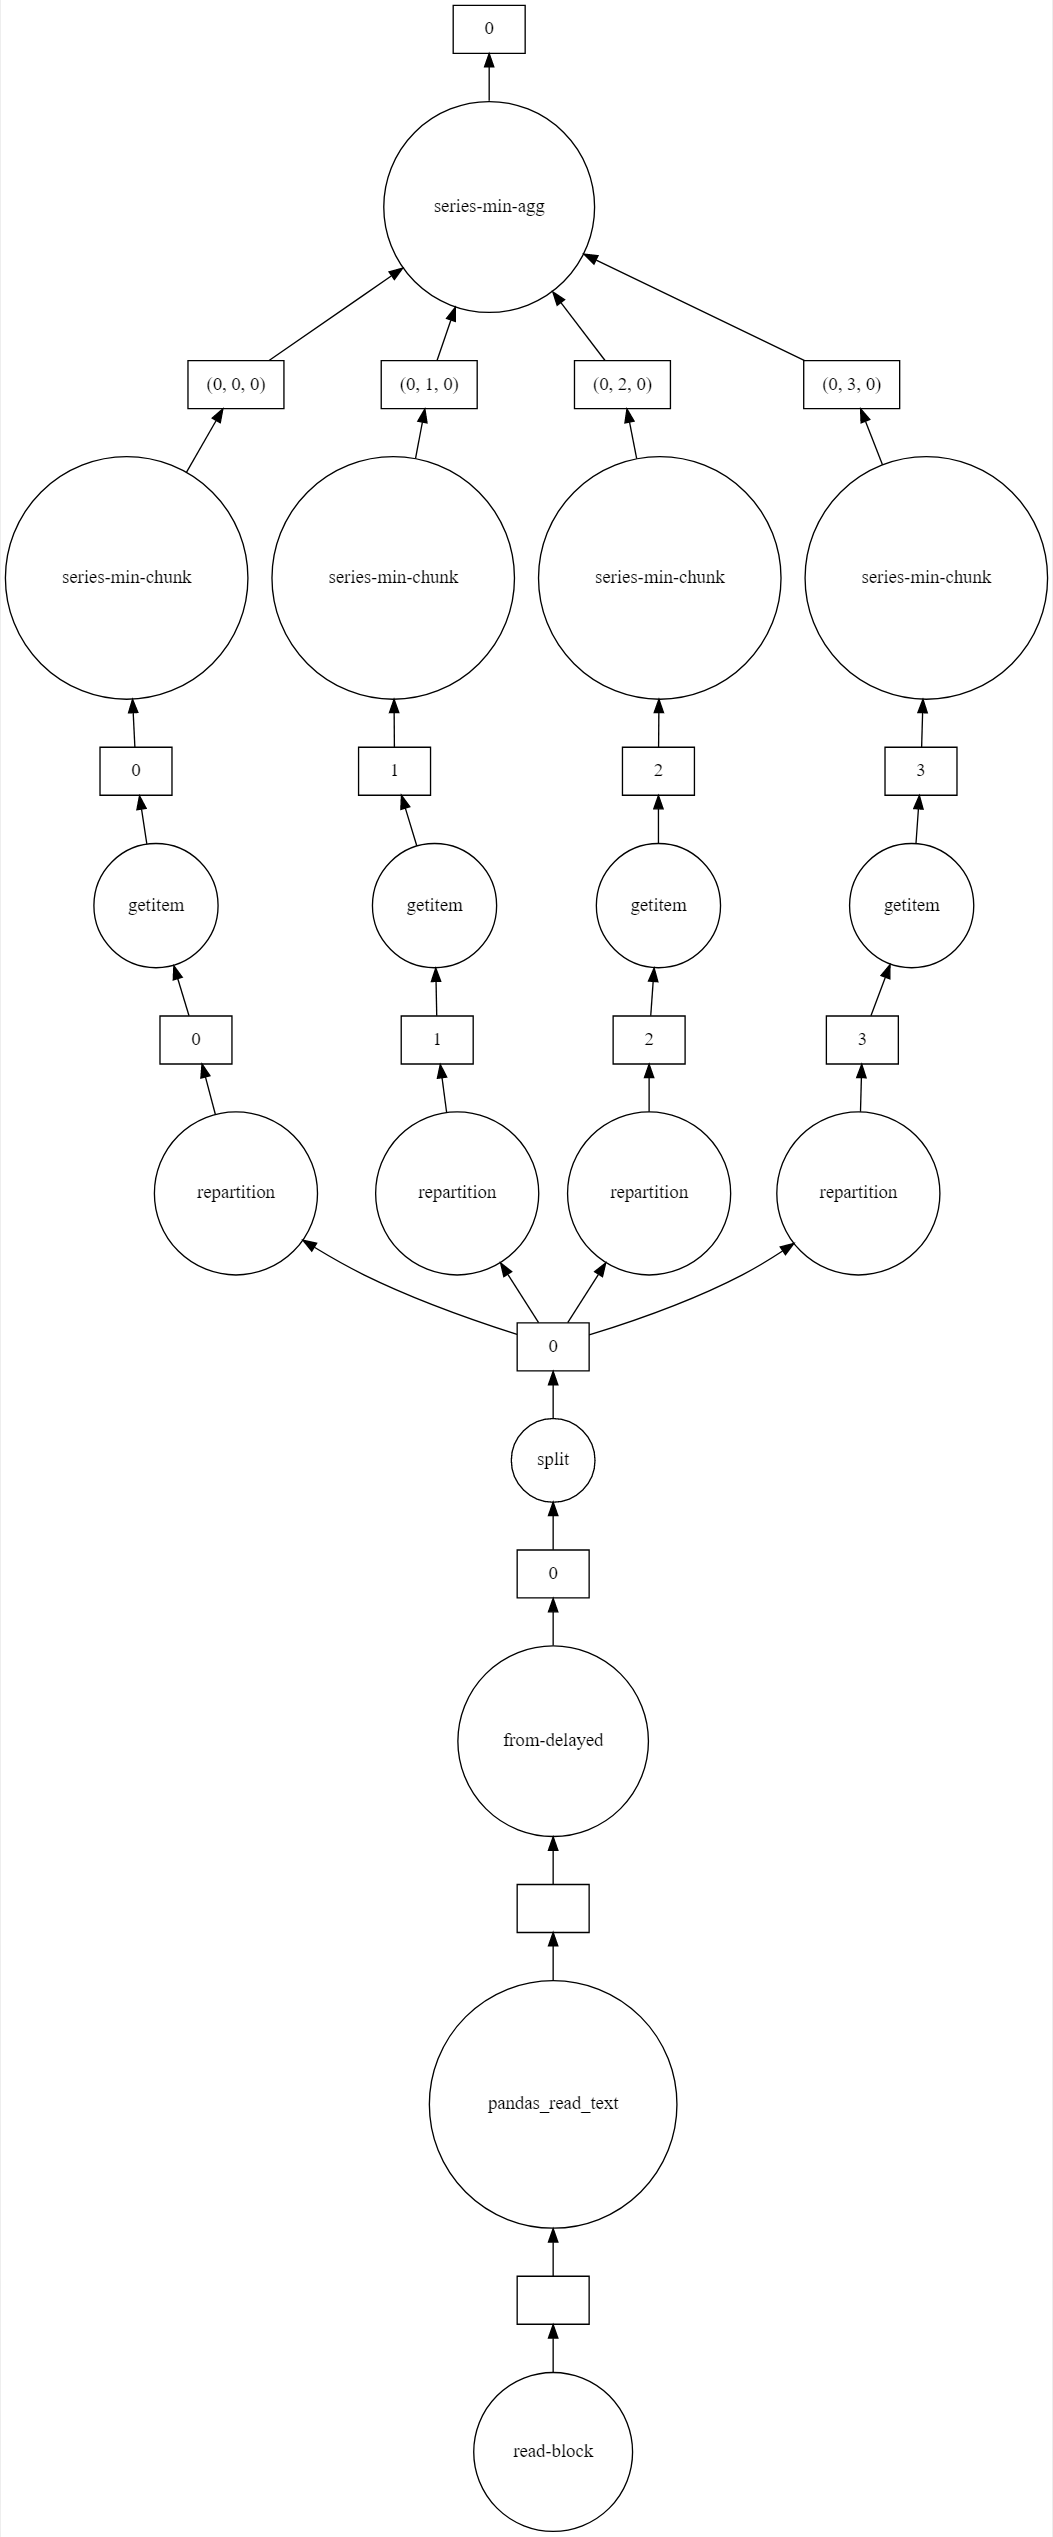

In [ ]:
# matrices
# Una matriz dask se parece mucho a una matriz numpy. Sin embargo, una matriz dask no contiene directamente ningún dato. 
# En cambio, representa simbólicamente los cálculos necesarios para generar los datos. En realidad, no se calcula nada hasta que se necesitan los valores numéricos reales. 
# Este modo de operación se llama "perezoso"; permite construir simbólicamente cálculos grandes y complejos antes de entregarlos al planificador para su ejecución.

In [7]:
# Matrix en numpy
import numpy as np
shape = (1000, 4000)
ones_np = np.ones(shape)
ones_np

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [8]:
print('%.1f MB' % (ones_np.nbytes / 1e6))

32.0 MB


In [9]:
# creamos la matriz utilizando dask
import dask.array as da
ones = da.ones(shape)
ones
#Esto funciona, pero no le dijimos a dask cómo dividir la matriz, por lo que no está optimizado para el cálculo distribuido.

dask.array<ones_like, shape=(1000, 4000), dtype=float64, chunksize=(1000, 4000), chunktype=numpy.ndarray>

In [10]:
chunk_shape = (1000, 1000)
ones = da.ones(shape, chunks=chunk_shape)
ones

dask.array<ones_like, shape=(1000, 4000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [11]:
# Tenga en cuenta que solo vemos una representación simbólica de la matriz, incluida su forma, tipo de d y tamaño de fragmento. 
# Aún no se han generado datos. Cuando llamamos .compute()a una matriz dask, el cálculo se activa y la matriz dask se 
# convierte en una matriz numpy.
ones.compute()

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

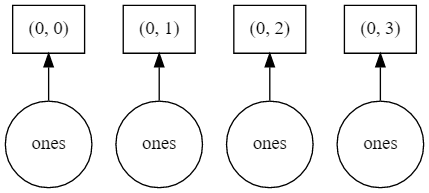

In [17]:
sum_of_ones = ones.sum()

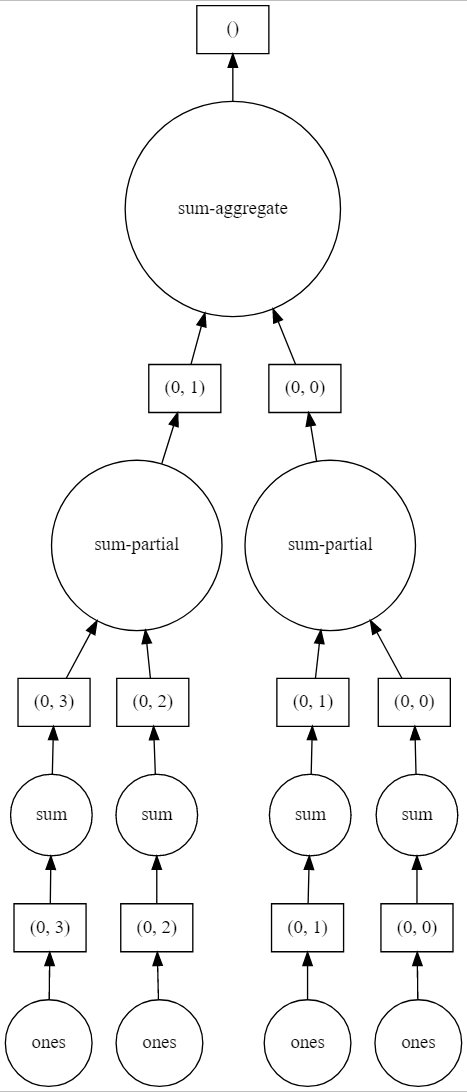

In [18]:
# Calculo mas grande
bigshape = (200000, 4000)
big_ones = da.ones(bigshape, chunks=chunk_shape)
big_ones

dask.array<ones_like, shape=(200000, 4000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

C:\Users\Kremlin\anaconda3\lib\statistics.py:168: RuntimeWarning: overflow encountered in long_scalars
  partials[d] = partials_get(d, 0) + n


In [19]:
print('%.1f MB' % (big_ones.nbytes / 1e6))


6400.0 MB


In [21]:
big_calc = (big_ones * big_ones[::-1, ::-1]).mean()

result = big_calc.compute()
result

C:\Users\Kremlin\anaconda3\lib\statistics.py:168: RuntimeWarning: overflow encountered in long_scalars
  partials[d] = partials_get(d, 0) + n


1.0